<a href="https://colab.research.google.com/github/DimitriRud/Satisfaction-Des-Passagers-Aeriens/blob/main/Satisfaction_Des_Passagers_A%C3%A9riens_Code_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet : "Satisfaction Des Passagers Aeriens"**

*Dimitri Rudenko, Machine Learning Engineer - Block 6 - Lead a Data Project avec Jedha, Valence, Jan-Fev 24*


# **Téléchargement des Données et des Bibliothèques**

In [1]:
# Import des Bibliothèques

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Creation de DataFrame et visualisation de toutes les colonnes

df = pd.read_csv('Main_Airways.csv')
pd.set_option('display.max_columns', None)
df.head()

,int64_field_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,7251,101867,Female,Loyal Customer,18,Business travel,Eco,1747,0,5,5,5,0,1,4,0,4,3,4,2,4,0,86,59.0,neutral or dissatisfied
1,25512,96422,Male,Loyal Customer,23,Business travel,Eco Plus,1407,0,5,5,5,0,1,4,0,2,1,4,1,3,0,28,26.0,neutral or dissatisfied
2,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
3,120,27872,Male,Loyal Customer,25,Business travel,Eco Plus,680,0,5,0,2,1,0,1,1,3,1,4,5,5,1,0,0.0,satisfied
4,250,108010,Male,disloyal Customer,20,Business travel,Business,271,0,0,0,1,1,0,1,1,5,4,4,4,4,1,0,0.0,satisfied


In [18]:
# Revue des données

df.shape

(129880, 25)

In [19]:
df.describe().round(2)

,int64_field_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,44158.70,64940.50,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,31207.38,37493.27,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,16234.75,32470.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,38963.50,64940.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,71433.25,97410.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [20]:
# Revue de types des données

df.dtypes

int64_field_0                          int64
id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure_Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_

# **Nettoyage des données**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   int64_field_0                      129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer_Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type_of_Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight_Distance                    129880 non-null  int64  
 8   Inflight_wifi_service              129880 non-null  int64  
 9   Departure_Arrival_time_convenient  129880 non-null  int64  
 10  Ease_of_Online_booking             129880 non-null  int64  
 11  Gate_location                      1298

In [22]:
df.isnull().sum()

#Suite à l'analyse on voit qu'il y a des 0 dans la colonnes "Arrival Delay". Au même temps nous n'avons pas des nulls.

int64_field_0                          0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction    

In [23]:
df['Arrival_Delay_in_Minutes']

# Ici on voit que certains passegers n'ont pas eu des delais d'arrivé de l'avion. Nous pouvons:
# 1) Supprimer des lignes 2) Laisser des zeros 3) Mettre la valeur moyenne
# On part sur l'option №3.

0         59.0
1         26.0
2          6.0
3          0.0
4          0.0
          ... 
129875     0.0
129876     0.0
129877    21.0
129878     0.0
129879     0.0
Name: Arrival_Delay_in_Minutes, Length: 129880, dtype: float64

In [24]:
df['Arrival_Delay_in_Minutes'].mean().round(2)

15.09

In [25]:
df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean().round(2), inplace = True)

In [26]:
df.isnull().sum()

int64_field_0                        0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [64]:
nan_columns = df.columns[df.isna().any()].tolist()

# **Affichage des diagrammes à l'étape de l'analyse des données**




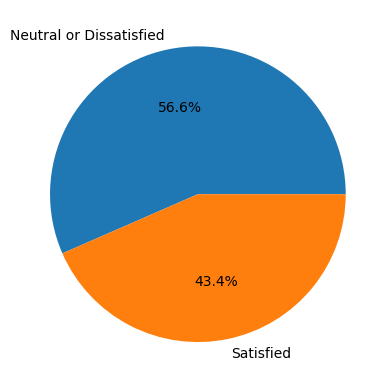

In [4]:
# Diagrame de Satisfaction des Clients
plt.pie(df['satisfaction'].value_counts(), labels= ['Neutral or Dissatisfied', 'Satisfied'], autopct='%1.1f%%')
plt.show()

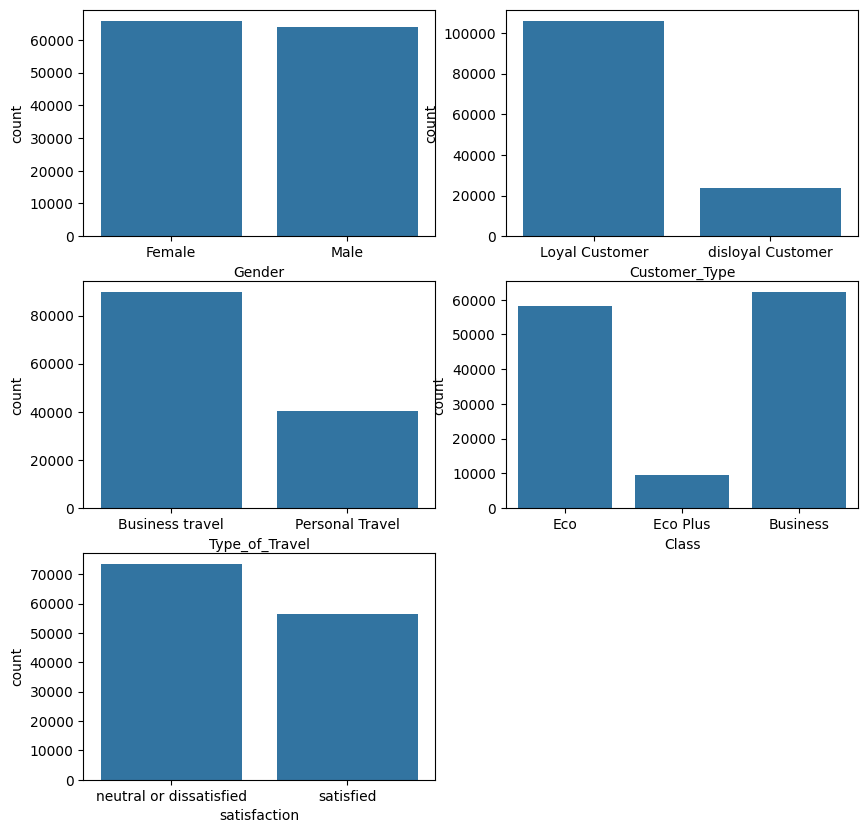

In [ ]:
cols = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction']
plt.figure(figsize=(10, 10))
for i, col in enumerate(cols):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=col, data=df)
plt.show()

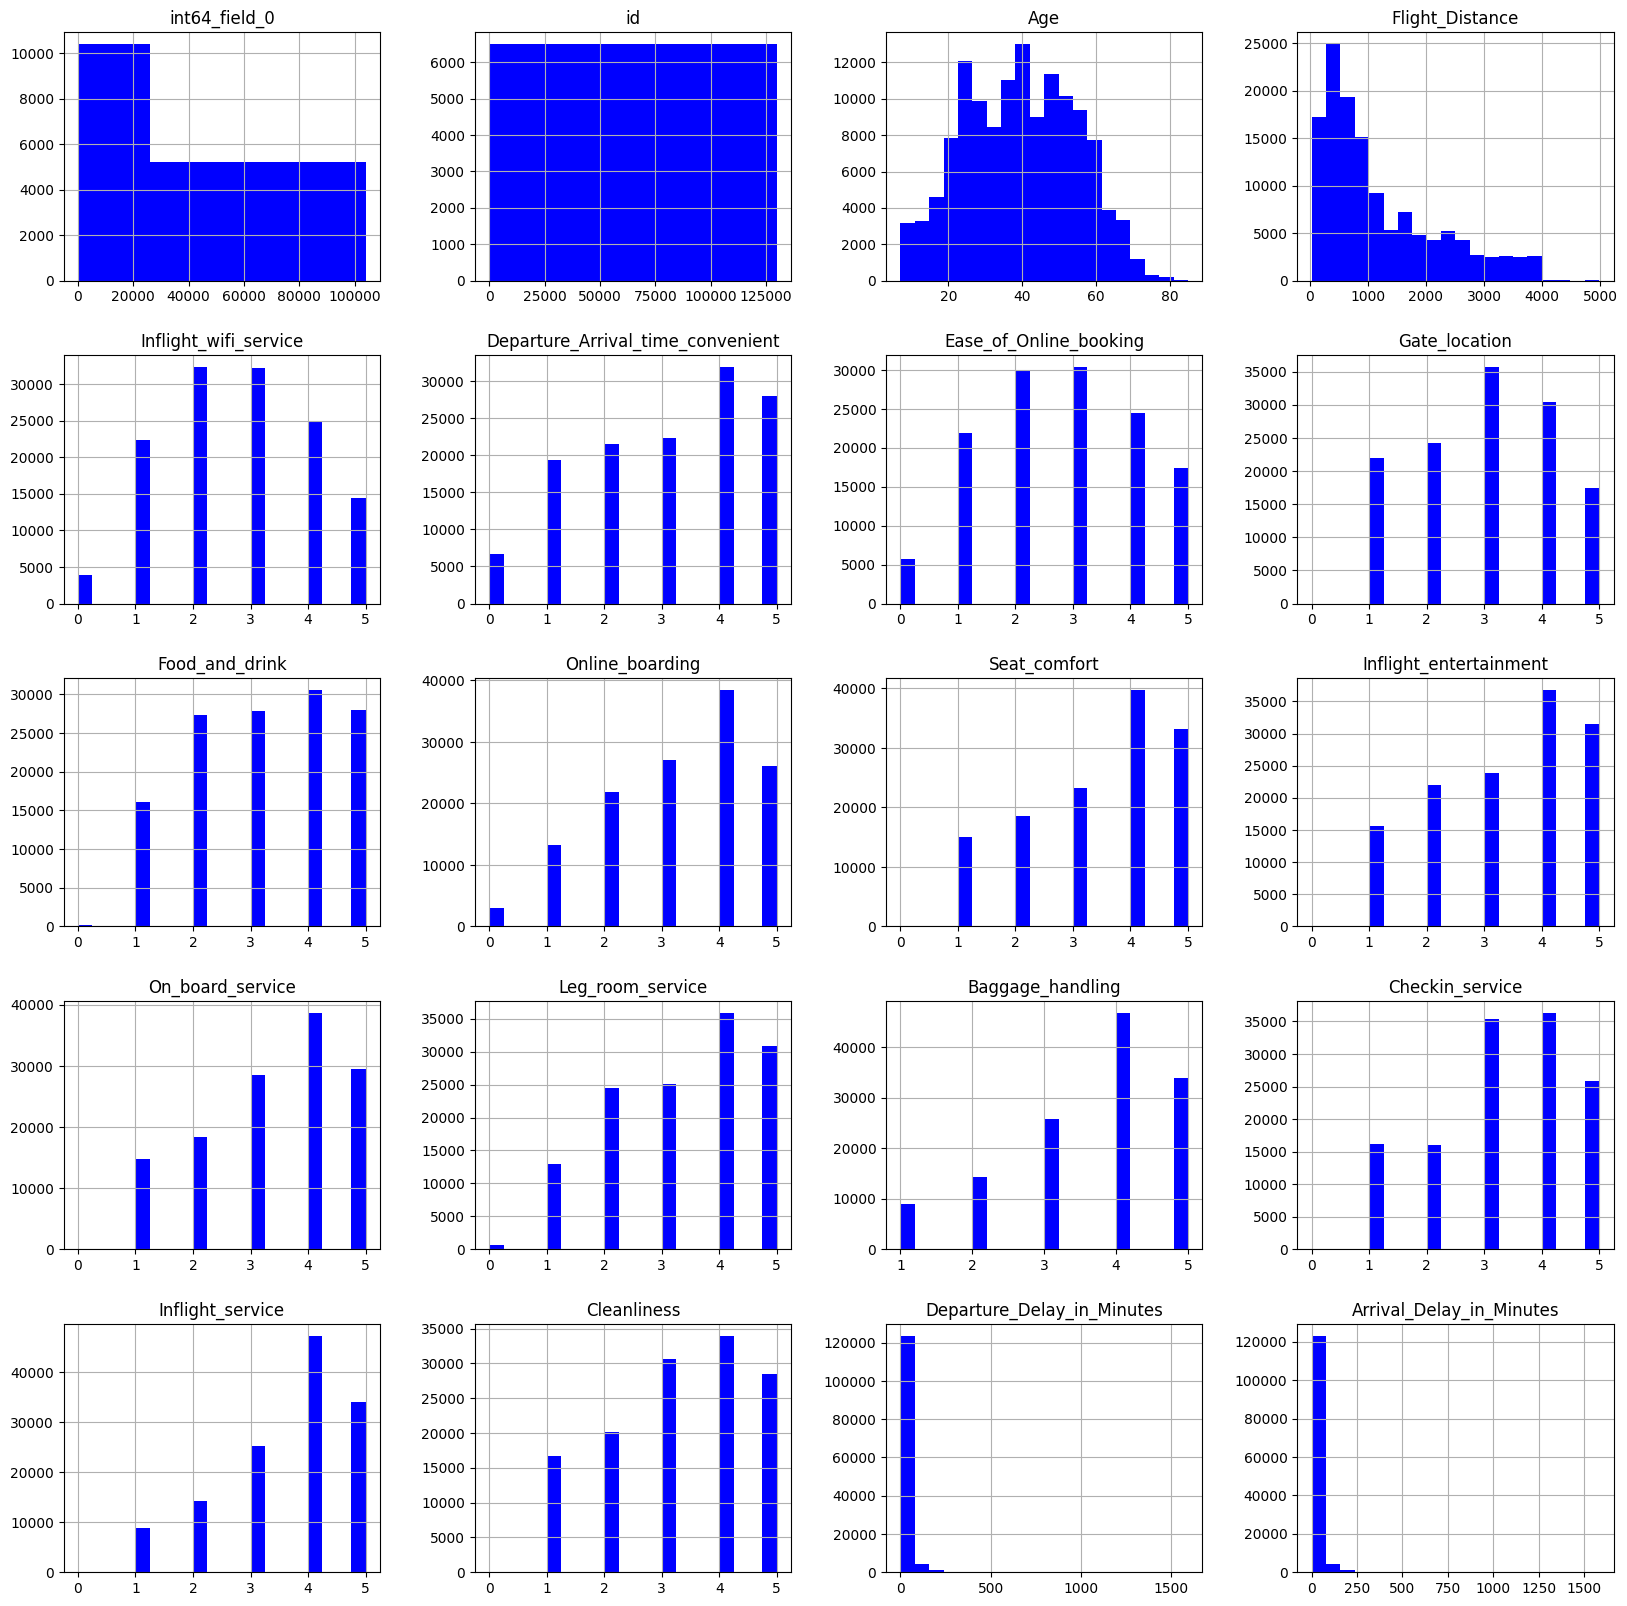

In [7]:
# Histogrammes pour toutes les colonnes numériques
df.hist(bins=20, figsize=(20, 20), color = 'blue')
plt.show()

# Encodage des données avant la création du modèle.

In [53]:
df.select_dtypes(include='object').columns

Index(['satisfaction'], dtype='object')

In [54]:
df['Gender'].unique()


array([0, 1])

In [55]:
df['Customer_Type'].unique()

array([0, 1])

In [56]:
df['Type_of_Travel'].unique()

array([0, 1])

In [57]:
df['Class'].unique()

array([1, 2, 0])

In [58]:
df['satisfaction'].unique()

array([nan], dtype=object)

In [89]:
label_encoder = LabelEncoder()

columns = df.select_dtypes(include='object')

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()



,int64_field_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,7251,101867,0,0,18,0,1,1747,0,5,5,5,0,1,4,0,4,3,4,2,4,0,86,59.0,0
1,25512,96422,1,0,23,0,2,1407,0,5,5,5,0,1,4,0,2,1,4,1,3,0,28,26.0,0
2,3,77959,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,0
3,120,27872,1,0,25,0,2,680,0,5,0,2,1,0,1,1,3,1,4,5,5,1,0,0.0,0
4,250,108010,1,1,20,0,0,271,0,0,0,1,1,0,1,1,5,4,4,4,4,1,0,0.0,0


In [60]:
# Les données sont prêtes à être utilisées avec les modèles
df.dtypes

int64_field_0                          int64
id                                     int64
Gender                                 int64
Customer_Type                          int64
Age                                    int64
Type_of_Travel                         int64
Class                                  int64
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure_Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_

# Création de graphiques supplémentaires

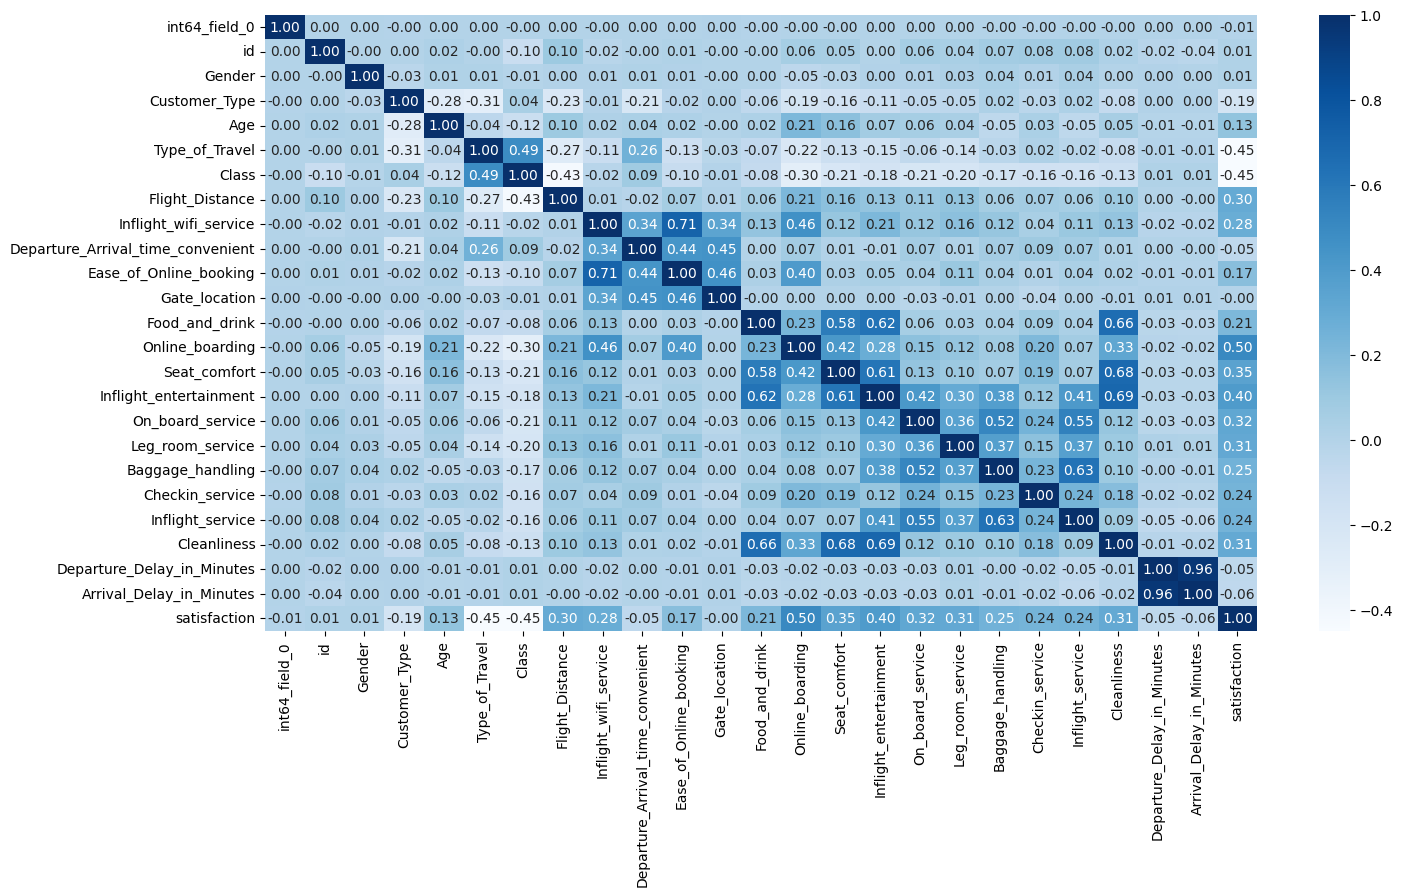

In [97]:
# Observation de la correlation entre les données differentes
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot = True, fmt='.2f', cmap='Blues')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

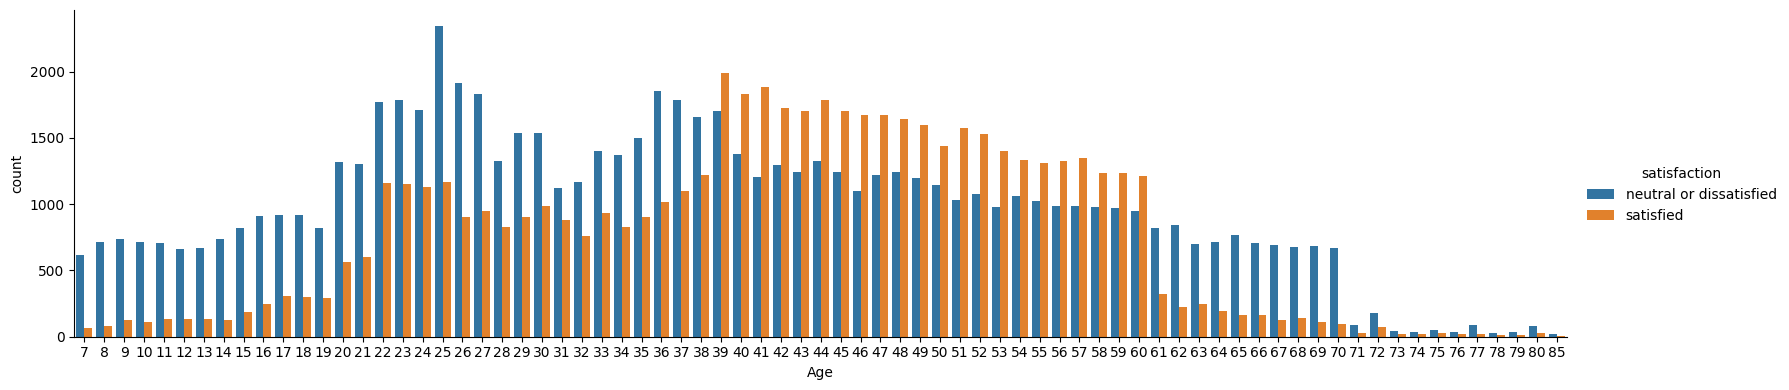

In [28]:
# Diagramme montrant la dépendance de la satisfaction du service en fonction de l'âge des passagers
sns.catplot(data=df, x='Age', height=4, aspect=4, kind='count', hue='satisfaction')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

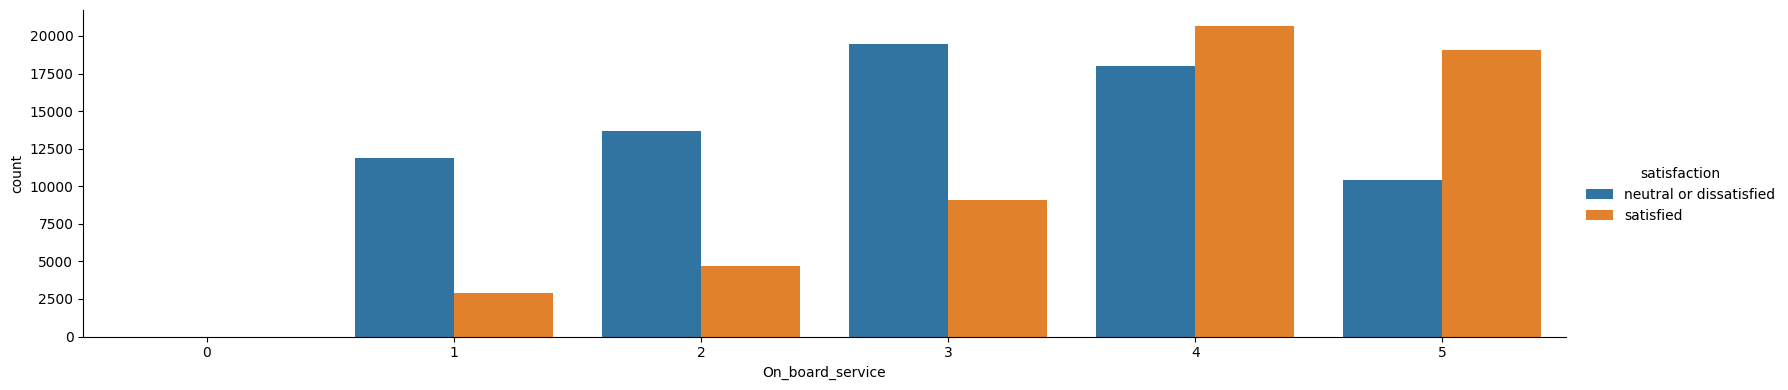

In [29]:
# Diagramme montrant la satisfaction générale des passagers lors de l'évaluation du service à bord

sns.catplot(data=df, x='On_board_service', height=4, aspect=4, kind='count', hue='satisfaction')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

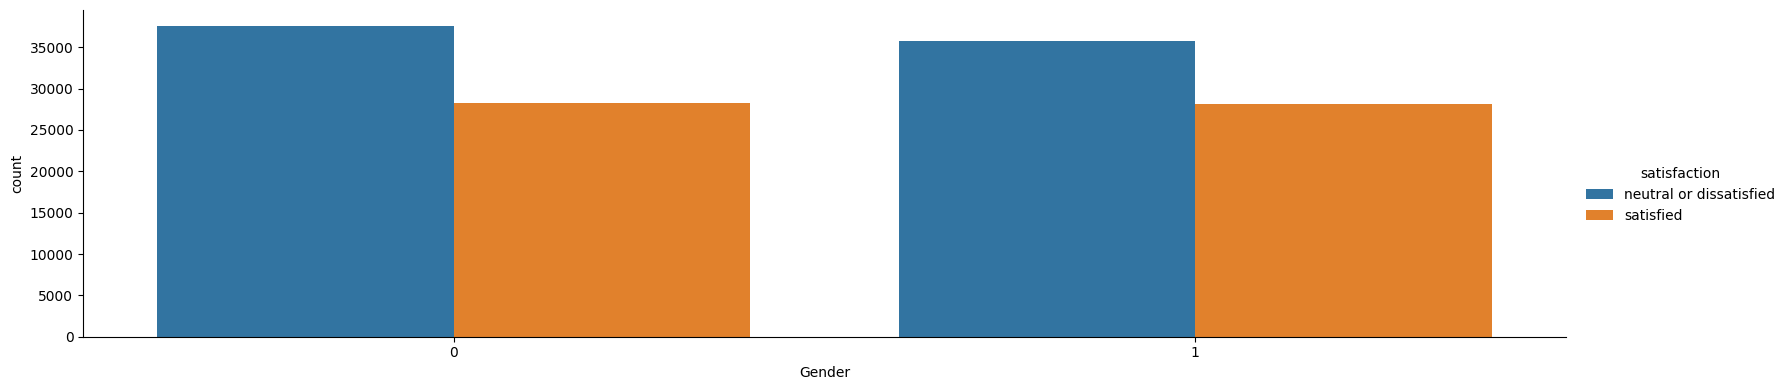

In [30]:
# Diagramme montrant la satisfaction générale des passagers en fonction du genre. La dépendance est absente.

sns.catplot(data=df, x='Gender', height=4, aspect=4, kind='count', hue='satisfaction')
plt.show

# Construction de modèles

In [35]:
X = df.drop(columns='satisfaction')
X.head(5)

,int64_field_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,7251,101867,0,0,18,0,1,1747,0,5,5,5,0,1,4,0,4,3,4,2,4,0,86,59.0
1,25512,96422,1,0,23,0,2,1407,0,5,5,5,0,1,4,0,2,1,4,1,3,0,28,26.0
2,3,77959,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
3,120,27872,1,0,25,0,2,680,0,5,0,2,1,0,1,1,3,1,4,5,5,1,0,0.0
4,250,108010,1,1,20,0,0,271,0,0,0,1,1,0,1,1,5,4,4,4,4,1,0,0.0


In [36]:
y = df['satisfaction']
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [37]:
# Verifier NaN values de X and y
print("NaNs in X:", np.isnan(X).sum())
print("NaNs in y:", np.isnan(y).sum())

NaNs in X: int64_field_0                        0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
dtype: int64
NaNs in y: 0


###**DecisionTreeClassifier** **= 0,944**

In [120]:
# Création de la modèle de l'arbre de decision et la division des données sur train and test

from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [104]:
# Verifier Shapes de X and y:

print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y shape:", y.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X shape: (129880, 24)
X_train shape: (103904, 24)
X_test shape: (25976, 24)
y shape: (129880,)
y_train shape: (103904,)
y_test shape: (25976,)


In [106]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
predictions = model.predict(X_test)
len(predictions)

25976

In [116]:
# La valeur moyenne de précision du modèle reste constamment élevée lors des redémarrages

model_score = accuracy_score(y_test, predictions)
model_score

0.9449876809362489

###**RandomForestClassifier** **= 0,963**

In [121]:
# Création de la modèle de Random Forest

from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
len(predictions)

model_score = accuracy_score(y_test, predictions)
model_score



0.963658761934093

###**KNeighborsClassifier** **= 0,599**

In [ ]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
len(predictions)

model_score = accuracy_score(y_test, predictions)
model_score

###**LogisticRegression = 0,769**

In [40]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
len(predictions)

model_score = accuracy_score(y_test, predictions)
model_score

0.7696720049276256

# Test de modèle manuelement

###Prédiction sans colonnes de vote.

In [48]:
# Nous testons manuellement le modèle avec des données sans les avis des passagers. Pour obtenir un résultat Satisfied/Dissatisfied
# à partir de données indépendantes du passager (Genre, Age, Delay, Arrival, etc.)

X = df[['Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']]
X.head()



,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,18,0,0,1,1747,86,59.0
1,1,23,0,0,2,1407,28,26.0
2,1,44,0,0,0,3377,0,6.0
3,1,25,0,0,2,680,0,0.0
4,1,20,1,0,0,271,0,0.0


In [88]:
y = df['satisfaction']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: satisfaction, dtype: int64

In [90]:
# Assuming your DataFrame is named df and the column is named 'your_column_name'
value_counts = df['satisfaction'].value_counts()

# Display the counts
print(value_counts)

0    129880
Name: satisfaction, dtype: int64


###**RandomForestClassifier (sans avis)** **= 0,756**

In [ ]:
# Création de la modèle de Random Forest sans les avis des clients

from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
len(predictions)

model_score = accuracy_score(y_test, predictions)
model_score

In [82]:
# Création des profils de clients

test_inputs = {
 'Gender': [1,0,1,0,1],
 'Age': [35,25,10,70,33],
 'Customer_Type': [0,1,1,0,1],
 'Type_of_Travel': [0,0,0,1,1],
 'Class': [1,1,1,0,0],
 'Flight_Distance': [1200,600,1500,600,2500],
 'Departure_Delay_in_Minutes': [0,60,5,180,0],
 'Arrival_Delay_in_Minutes': [0,60,5,180,0]
 }

test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,600,60,60
2,1,10,1,0,1,1500,5,5
3,0,70,0,1,0,600,180,180
4,1,33,1,1,0,2500,0,0


In [ ]:
# Testons notre modèle sur Satisfait/Dissatisfait-Neutral

model.predict(test_df)